### Write a Data Science Blog Post

This is my first project at Udacity. I worked with the Titanic survivors dataset after spending some time poking. And I will focus on doing some work about how to start the first step being a Data Scientist based on my understanding.<br><br>
The below are what I am goIng to illustrate:

1: Business Understanding (a brief description of the problem and questions of interst) <br><br>
2: Data Understanding (Access and Explore)<br><br>
3: Data Preparation(Cleaning)<br><br>
4: Modelling<br><br>
5: Evaluation<br><br>


### Business understanding<br><br>

Problems:The goals are to investigate what sorts of people were likely to survive and elaborate how to predict if a passenger of Titanic wil survivie or not using the tools of machine learning.

The questions of interst will be depicted below<br><br>
How to look at the data?<br><br>
How to deal with the missing values and how to choose the proper impute methods based on the given data set?<br><br>
In general, do sex appear to have higher survived possibility?<br><br>
How many of the columns are considered categorical? How to handle them?<br><br>
How to build the model for predicting the survived possiblity?<br><br>
How to modify the parameteres to get a higher accuracy?<br><br>


### Data Understanding

The data.csv file can be found [here](https://github.com/JingLi001/DataScientistNanodegree_Project1) <br><br>
Let's take a look at this data firstly

In [1]:
#import pandas and open the tatanic dataset downloaded online
import pandas as pd  
data = pd.read_csv(r"C:/Users/Administrator/Desktop/data.csv",index_col=0)

In [2]:
# View first few lines of the data
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# You can also view the data types and missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


As depicted above,this data contains 891 rows (samples) and 11 columns, where 10 related explanatory factors have been considered and the column, ‘Survived’, is the response variable.In this case, you see that there are only 714 non-null values for the 'Age' column in a DataFrame with 891 rows. This means that are are 177 null or missing values. We will see later how to deal with missing values.

In [4]:
# you can also see the statistical summary of the training data
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Preparation

After looking into the data, the next step is to prepare the data for modeling

# Any column can be dropped?

We can see that the columns,"Name","Ticket", could be dropped since there seems to be no correlation with the target variable 'Survived'.<br><br> 
And,the number of the values of 'Cabin' is only 204 wihch is less than 1/4 times of other columns, in which case it seems not meaningful to impute.<br><br>
In this case, the above three columns can be dropped.

In [5]:
#Drop the following three columns
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

In [6]:
#Chech whether the above three columns have been deleted from the dataframe
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [7]:
#Check out info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


It can be easily identify that the above three columns have been dropped.

# How to deal with missing values?

The missing values of 'Age' column can be imputed using the median values of the variable. Median is a suitable value for imputing as it is less likely to be affected by outliers in the data. Usually it is a good practice to fill the missing numerical values by median.

In [8]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [9]:
# Considering the unbalanced values,it should drop any rows with missing values
data = data.dropna()

In [10]:
#Check out info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [11]:
#Look at the data
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


As analyzed above,each column presents the same non-null values.

# In general, what sorts of people appear to have higer survived possibility? 

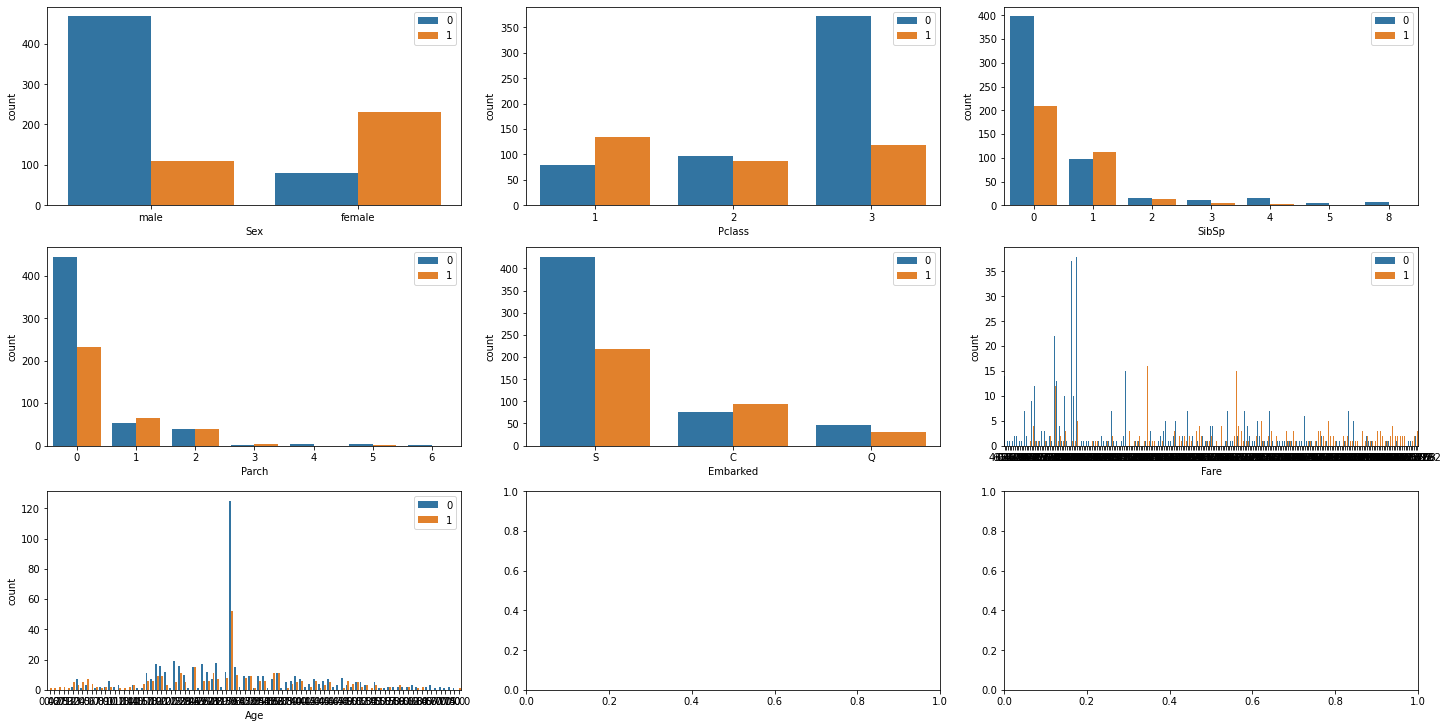

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Fare', 'Age']

fig, axes = plt.subplots(3, 3, constrained_layout=True, figsize=(20,10))
for i, col in enumerate(columns) :
    if (i == 8):
        break
    sns.countplot(x=data[col], hue=data["Survived"], ax=axes[int(i / 3), int(i % 3)])
    axes[int(i / 3), int(i % 3)].legend(loc='upper right')

Graphs above are showing the survival probability for each feature. Blue bar shows us how many people were dead.<br><br> 
Sex seems the most important feature. If you were male, it's not much chance you can survived. For other features, we can see that who had much more chance to survive.<br><br> 
With a simple calculation,We had the highest probability of survival if you were female, on first-class, had 1 sibling or married, had 1 parent or 1 child, paid highest fare, underage, and on aboard in Cherbourg.

# What is the percentage of a female can survive compared with a male?

We can use groupby to figure out the proportion of women that survived, along with the proportion of men

In [13]:
data.groupby(['Sex']).mean()['Survived'].sort_values()

Sex
male      0.188908
female    0.740385
Name: Survived, dtype: float64

As can be seen from the result, about 74% females can survive but only 18% males do.

# How many of the columns are consirded categorical? How to handle them?

In [14]:
#We can use the command select_dtypes to obtain the number of categorical

In [15]:
data.select_dtypes(include=['object']).shape[1]

2

In [16]:
# Convert binary variables to numeric variables
data['Sex'] = (data['Sex']== 'male').astype('int')

In [17]:
#Look at the data
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S
2,1,1,0,38.0,1,0,71.2833,C
3,1,3,0,26.0,0,0,7.9250,S
4,1,1,0,35.0,1,0,53.1000,S
5,0,3,1,35.0,0,0,8.0500,S


In [18]:
#Convert three categorical variables to numeric variables
embarked = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: embarked.index(x))

In [19]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [20]:
# Now, there are no missing values and all numerical variables. The data preprocessing has been finished.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 99.0 KB


# Modelling

So far, by analyzing the data, we’ve looked at  each feature affects survival rates.<br><br> 
Now let’s build a model based on this analysis and predict whether a passenger lives or dies with the given values.<br><br> 
Build a Decision Tree Classifier:<br><br> 
What is a decision tree classifier? It is a tree that allows you to classify data points, which are also known as target variables, based on feature variables.The more detailed introduction can be found [here](https://en.wikipedia.org/wiki/Decision_tree) 

In [21]:
#Split into explanatory and response variables
X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [23]:
#Split into train and test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

In [24]:
Xtrain.head() # the index of the train set is mixed

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
96,3,1,29.699118,0,0,8.05,0
273,2,0,41.000000,0,1,19.50,0
498,3,1,29.699118,0,0,15.10,0
426,3,1,29.699118,0,0,7.25,0
283,3,1,16.000000,0,0,9.50,0


In [25]:
# Correct the index of the test set and training set
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [26]:
Xtrain.head() # the index comes to normal

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,29.699118,0,0,8.05,0
1,2,0,41.000000,0,1,19.50,0
2,3,1,29.699118,0,0,15.10,0
3,3,1,29.699118,0,0,7.25,0
4,3,1,16.000000,0,0,9.50,0


In [27]:
clf = DecisionTreeClassifier(random_state=42) # Instantiate
clf = clf.fit(Xtrain, Ytrain) #Fit
score_ = clf.score(Xtest, Ytest)# Score the model

In [28]:
score_

0.7752808988764045

In [29]:
score = cross_val_score(clf,X,y,cv=10).mean() # Based on cross-validation method
score

0.7818181818181819

After fitting the train data, we got the initial accuracy of the tree, which is about 78%. In order to explore a higher accuracy, we will use GridSearch with Cross Validation to determine the hyper-parameter max_depth of decision tree classifier.

# Evaluation

0.8177860061287026


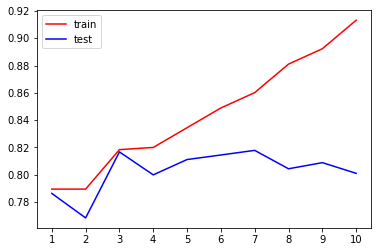

In [41]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [42]:
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)

parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

GS.best_params_

GS.best_score_

0.819969278033794

The Y-axis is prediction accuracy and the X-axis is the depth of the tree. A higher accuracy, 78% versus 81.9%, can be achieved after grid search.